# EDA and first look / analysis

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import argparse
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data 

df=pd.read_csv("../../data/clean/beer_profile_and_ratings.csv")

In [4]:
df

,name,style,brewery,beer name (full),description,abv,min ibu,max ibu,astringency,body,...,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,amber,altbier,alaskan brewing co.,alaskan brewing co. alaskan amber,"notes:richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,double bag,altbier,long trail brewing co.,long trail brewing co. double bag,"notes:this malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,long trail ale,altbier,long trail brewing co.,long trail brewing co. long trail ale,notes:long trail ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,doppelsticke,altbier,uerige obergarige hausbrauerei gmbh / zum uerige,uerige obergarige hausbrauerei gmbh / zum ueri...,notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,sleigh'r dark double alt ale,altbier,ninkasi brewing company,ninkasi brewing company sleigh'r dark double a...,notes:called 'dark double alt' on the label.se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,winter shredder,winter warmer,cisco brewers inc.,cisco brewers inc. winter shredder,notes:,8.8,35,50,15,37,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,the first snow ale,winter warmer,rj rockers brewing company,rj rockers brewing company first snow ale,notes:this hearty american pale ale contains a...,6.0,35,50,15,31,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,red nose winter ale,winter warmer,natty greene's pub & brewing co.,natty greene's pub & brewing co. red nose wint...,notes:,6.8,35,50,8,44,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,fish tale winterfish,winter warmer,fish brewing company / fishbowl brewpub,fish brewing company / fishbowl brewpub fish t...,notes:,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


In [5]:
# Vista general
print("Shape:", df.shape)
df.head()

Shape: (3197, 25)


,name,style,brewery,beer name (full),description,abv,min ibu,max ibu,astringency,body,...,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,amber,altbier,alaskan brewing co.,alaskan brewing co. alaskan amber,"notes:richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,double bag,altbier,long trail brewing co.,long trail brewing co. double bag,"notes:this malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,long trail ale,altbier,long trail brewing co.,long trail brewing co. long trail ale,notes:long trail ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,doppelsticke,altbier,uerige obergarige hausbrauerei gmbh / zum uerige,uerige obergarige hausbrauerei gmbh / zum ueri...,notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,sleigh'r dark double alt ale,altbier,ninkasi brewing company,ninkasi brewing company sleigh'r dark double a...,notes:called 'dark double alt' on the label.se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [6]:
# Tipos de datos
print(df.dtypes)

name                  object
style                 object
brewery               object
beer name (full)      object
description           object
abv                  float64
min ibu                int64
max ibu                int64
astringency            int64
body                   int64
alcohol                int64
bitter                 int64
sweet                  int64
sour                   int64
salty                  int64
fruits                 int64
hoppy                  int64
spices                 int64
malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
dtype: object


In [7]:
# Valores nulos
print(df.isna().sum())


name                 0
style                0
brewery              0
beer name (full)     0
description          0
abv                  0
min ibu              0
max ibu              0
astringency          0
body                 0
alcohol              0
bitter               0
sweet                0
sour                 0
salty                0
fruits               0
hoppy                0
spices               0
malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64


In [8]:
# Estadísticas generales
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,3197,3064,oktoberfest,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
style,3197,111,lager - adjunct,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brewery,3197,934,boston beer company (samuel adams),40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beer name (full),3197,3197,alaskan brewing co. alaskan amber,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,3197,1841,notes:,1347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abv,3197.0,NaN,NaN,NaN,6.526688,2.546997,0.0,5.0,6.0,7.6,57.5
min ibu,3197.0,NaN,NaN,NaN,21.180482,13.242242,0.0,15.0,20.0,25.0,65.0
max ibu,3197.0,NaN,NaN,NaN,38.986863,21.355281,0.0,25.0,35.0,45.0,100.0
astringency,3197.0,NaN,NaN,NaN,16.515796,10.410661,0.0,9.0,14.0,21.0,81.0
body,3197.0,NaN,NaN,NaN,46.129496,25.947842,0.0,29.0,40.0,58.0,175.0


In [9]:
df.columns

Index(['name', 'style', 'brewery', 'beer name (full)', 'description', 'abv',
       'min ibu', 'max ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

###  Tabla de variables del dataset `beer_profile_and_ratings.csv`

| Variable              | Tipo       | Descripción                                                                 |
|-----------------------|------------|-----------------------------------------------------------------------------|
| `name`                | Categórica | Nombre corto de la cerveza                                                 |
| `style`               | Categórica | Estilo de cerveza (e.g., IPA, Lager, Stout)                                |
| `brewery`             | Categórica | Nombre de la cervecería                                                    |
| `beer name (full)`    | Texto      | Nombre completo o extendido de la cerveza                                  |
| `description`         | Texto      | Descripción sensorial de la cerveza                                        |
| `abv`                 | Numérica   | Alcohol by Volume (%), contenido alcohólico                                |
| `min ibu`             | Numérica   | Valor mínimo de International Bitterness Units si se conoce                |
| `max ibu`             | Numérica   | Valor máximo de IBU si se conoce                                           |
| `astringency`         | Numérica   | Sensación de sequedad en boca (0–5)                                        |
| `body`                | Numérica   | Cuerpo o densidad percibida (0–5)                                          |
| `alcohol`             | Numérica   | Percepción del alcohol (0–5)                                               |
| `bitter`              | Numérica   | Intensidad del sabor amargo (0–5)                                          |
| `sweet`               | Numérica   | Intensidad del sabor dulce (0–5)                                           |
| `sour`                | Numérica   | Intensidad del sabor ácido (0–5)                                           |
| `salty`               | Numérica   | Percepción salada (0–5)                                                    |
| `fruits`              | Numérica   | Intensidad de notas frutales (0–5)                                         |
| `hoppy`               | Numérica   | Intensidad de lúpulo (0–5)                                                 |
| `spices`              | Numérica   | Percepción de especias (0–5)                                               |
| `malty`               | Numérica   | Intensidad de maltosidad (0–5)                                             |
| `review_aroma`        | Numérica   | Calificación del aroma por usuarios (0–5)                                  |
| `review_appearance`   | Numérica   | Calificación de apariencia por usuarios (0–5)                              |
| `review_palate`       | Numérica   | Calificación del paladar por usuarios (0–5)                                |
| `review_taste`        | Numérica   | Calificación del sabor por usuarios (0–5)                                  |
| `review_overall`      | Numérica   | Calificación global por usuarios (0–5)                                     |
| `number_of_reviews`   | Entera     | Número total de reseñas registradas                                        |


In [10]:
# Contar valores únicos en columnas categóricas clave
unique_names = df['name'].nunique()
unique_styles = df['style'].nunique()
unique_breweries = df['brewery'].nunique()

(unique_names, unique_styles, unique_breweries)

(3064, 111, 934)

In [11]:
# Renombrar las columnas del DataFrame a minúsculas y con guiones bajos
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

# Verificar los nuevos nombres de columna
df.columns


Index(['name', 'style', 'brewery', 'beer_name_full', 'description', 'abv',
       'min_ibu', 'max_ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

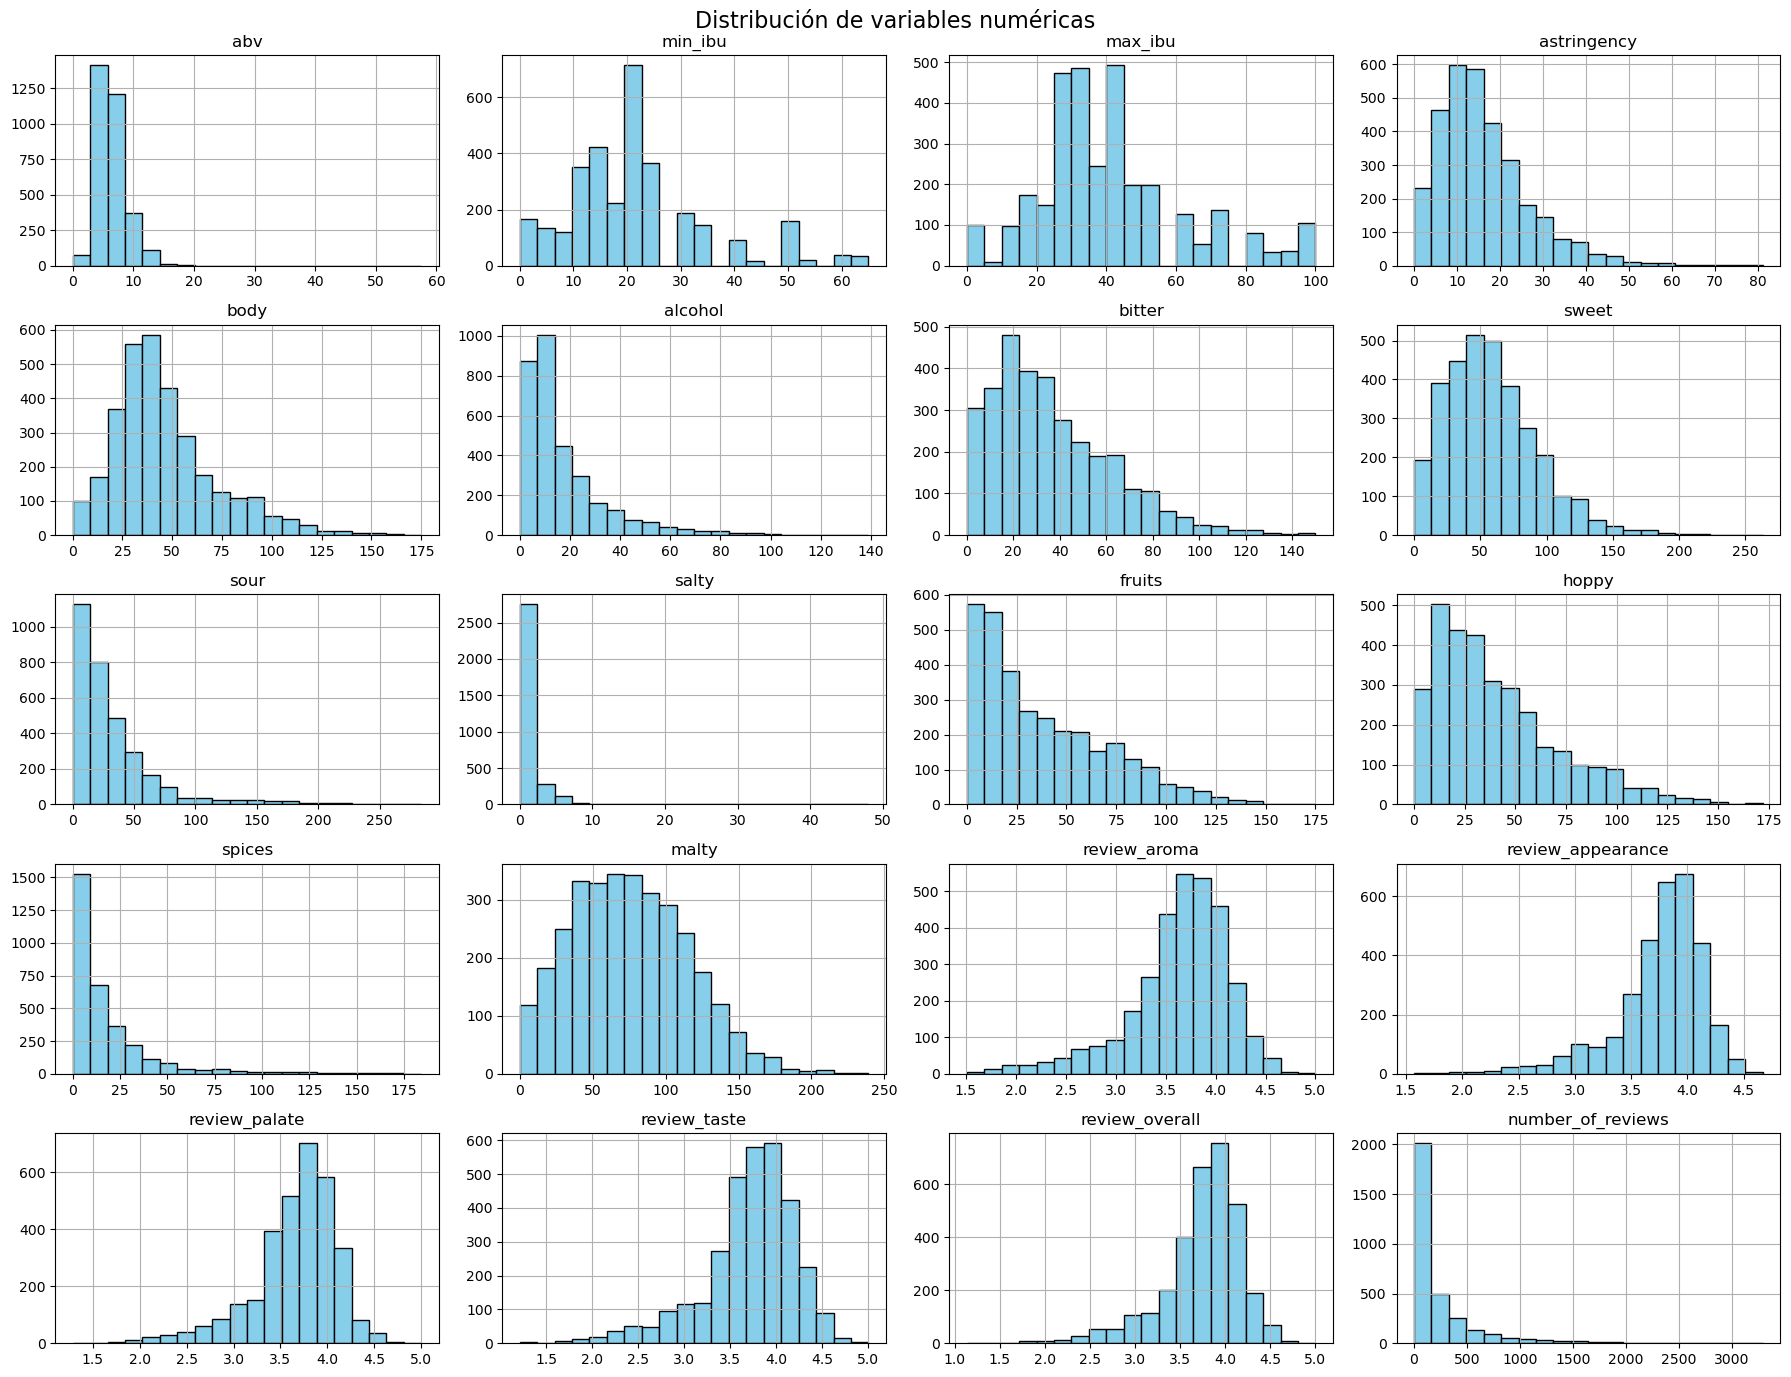

In [12]:
# Variables numéricas sensoriales y de reseña
numerical_cols = [
    'abv', 'min_ibu', 'max_ibu',
    'astringency', 'body', 'alcohol', 'bitter',
    'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
    'review_aroma', 'review_appearance', 'review_palate',
    'review_taste', 'review_overall', 'number_of_reviews'
]

# Histograma para variables seleccionadas
df[numerical_cols].hist(bins=20, figsize=(18, 14), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()


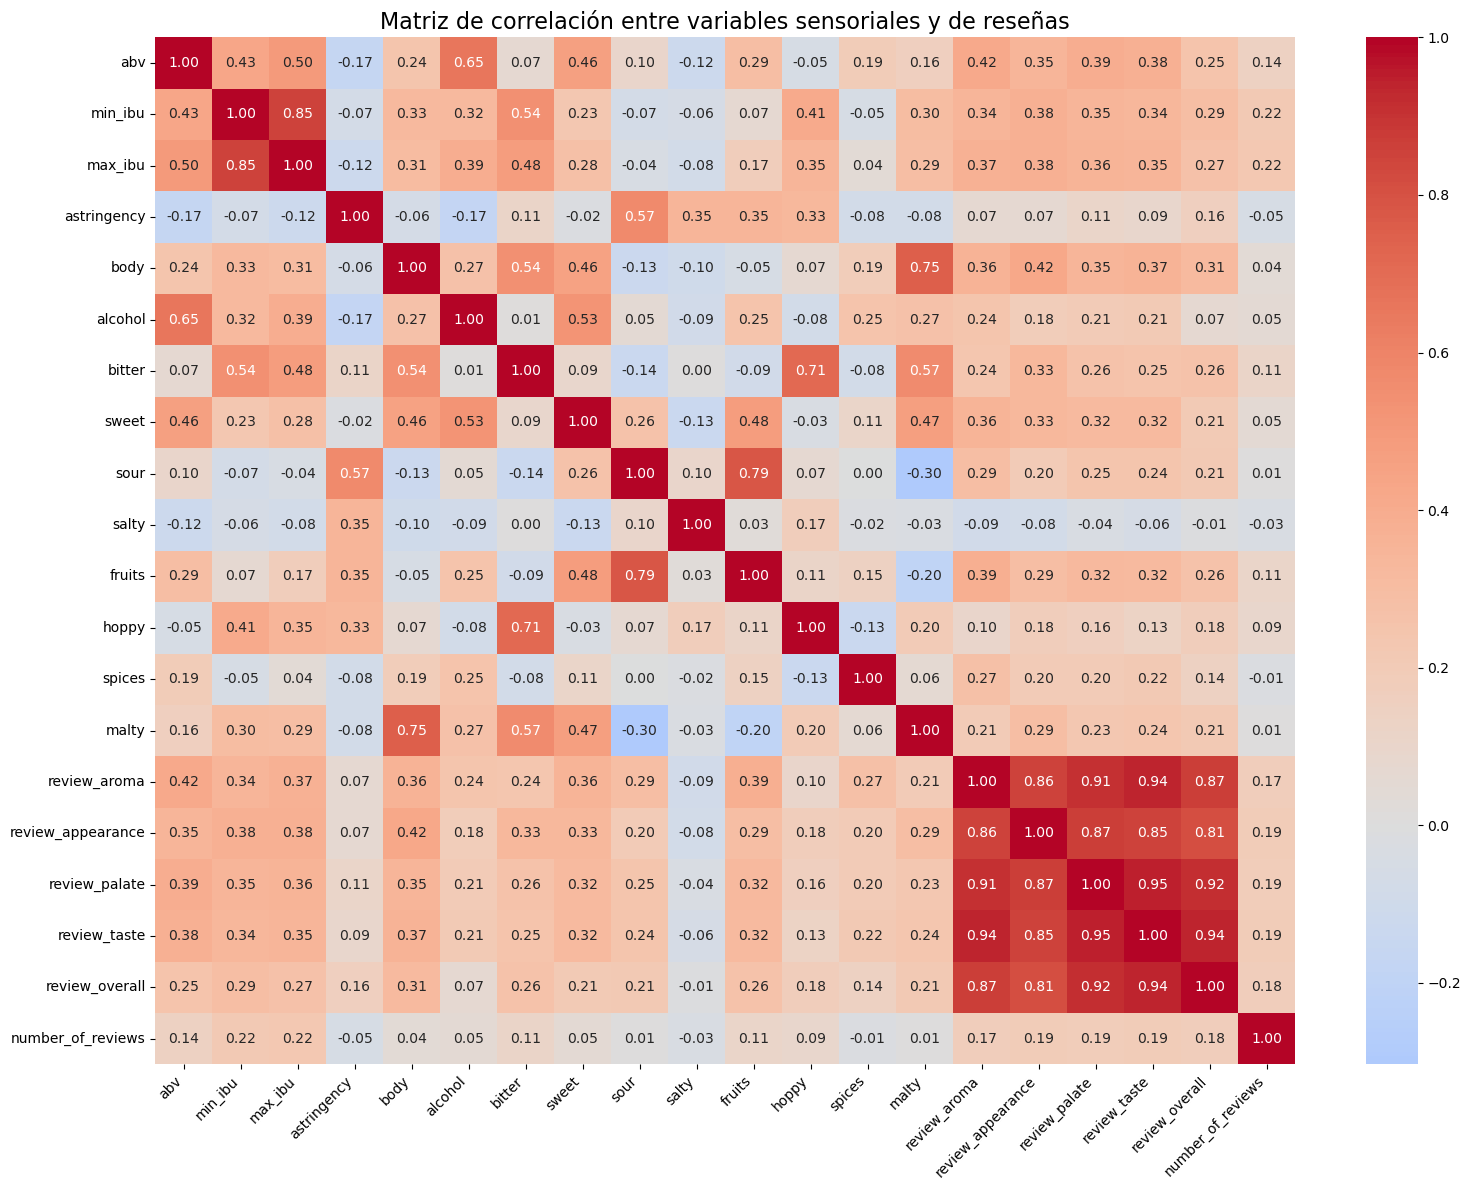

In [13]:
# Calcular matriz de correlación para las variables numéricas
corr_matrix = df[numerical_cols].corr()

# Visualizar la matriz con un mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables sensoriales y de reseñas", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


---

### Selección de columnas relevantes 

Creamos un subconjunto df_features con variables numéricas relevantes para definir el perfil de sabor y evaluación de cada cerveza.

In [14]:
# Selección de columnas sensoriales y de calificación
feature_cols = [
    'abv', 'astringency', 'body', 'alcohol', 'bitter',
    'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices',
    'malty', 'review_aroma', 'review_appearance', 'review_palate',
    'review_taste', 'review_overall'
]

# Subconjunto con esas columnas
df_features = df[feature_cols]
df_features.head()


,abv,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall
0,5.3,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082
1,7.2,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304
2,5.0,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239
3,8.5,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435
4,7.2,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708


In [15]:
# Revisar tipos y nulos antes
print(df_features.dtypes)
print(df_features.isna().sum())

# Convertir todo a numérico (cualquier error se convierte a NaN)
df_features_clean = df_features.apply(pd.to_numeric, errors='coerce')

# Revisar nulos después de la conversión
print(df_features_clean.isna().sum())

abv                  float64
astringency            int64
body                   int64
alcohol                int64
bitter                 int64
sweet                  int64
sour                   int64
salty                  int64
fruits                 int64
hoppy                  int64
spices                 int64
malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
dtype: object
abv                  0
astringency          0
body                 0
alcohol              0
bitter               0
sweet                0
sour                 0
salty                0
fruits               0
hoppy                0
spices               0
malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
dtype: int64
abv                  0
astringency          0
body                 0
alcohol             

###  Escalar los datos sensoriales

In [17]:
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(df_features_clean)

# Convertir a DataFrame para conservar los nombres
df_scaled = pd.DataFrame(X_scaled, columns=df_features_clean.columns)

# Ver primeras filas
df_scaled.head()


,abv,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall
0,-0.481696,-0.337764,-0.544620,-0.464895,0.412438,0.458897,-0.004066,-0.477041,-0.171238,0.528815,-0.435553,0.893892,-0.277850,-0.291487,-0.231379,-0.114903,0.224124
1,0.264397,-0.433834,0.419002,0.054477,-0.130468,-0.095428,-0.479264,-0.477041,-0.449949,-0.194896,-0.267152,0.217253,0.317111,0.227495,0.542245,0.631911,0.645588
2,-0.599501,-0.241694,-0.351895,-0.638019,0.218543,-0.445528,-0.619028,-0.477041,-0.883498,0.430127,-0.603954,-0.334083,-0.455100,-0.216397,-0.132554,-0.139523,0.186208
3,0.774882,-0.337764,0.341912,0.804681,0.412438,1.246621,-0.423358,-0.008068,0.324247,-0.030416,-0.098752,1.094378,1.012280,0.693124,1.090072,0.985079,0.580600
4,0.264397,0.815081,0.187733,0.516141,0.296101,-0.387178,-0.674933,-0.008068,-0.852530,0.331439,0.069649,0.492921,-0.027406,0.544349,0.164376,0.123714,0.157999


## KNN 

La métrica de distancia del coseno se utiliza en este modelo de recomendación porque permite comparar cervezas con base en la **forma general de su perfil sensorial**, sin verse afectada por la magnitud absoluta de cada atributo. A diferencia de la distancia euclidiana, que mide diferencias en valores exactos, la distancia del coseno se enfoca en el **ángulo entre los vectores de características**, lo que es útil cuando dos cervezas tienen proporciones similares entre atributos como `bitter`, `sweet` o `hoppy`, aunque sus valores absolutos sean distintos. Esto resulta especialmente adecuado para datos previamente escalados, y para espacios de alta dimensión como este, donde la métrica coseno tiende a ser más robusta y representativa para evaluar similitud relativa entre elementos.


In [19]:
from sklearn.neighbors import NearestNeighbors

# Instanciar el modelo KNN con métrica coseno
knn_model = NearestNeighbors(n_neighbors=6, metric='cosine')  # incluye la cerveza base
knn_model.fit(df_scaled)

# Elegir un índice de referencia (puedes probar con otros)
index_ref = 0

# Encontrar vecinos más cercanos
distances, indices = knn_model.kneighbors(df_scaled.iloc[[index_ref]])

# Mostrar nombres y distancias
print("Cerveza base:", df.iloc[index_ref]['name'])
print("\nCervezas recomendadas:")

for i, idx in enumerate(indices[0][1:], 1):  # excluye la cerveza base (índice 0)
    print(f"{i}. {df.iloc[idx]['name']} (Distancia: {distances[0][i]:.4f})")


Cerveza base: amber

Cervezas recomendadas:
1. old thumper (Distancia: 0.1615)
2. esb (Distancia: 0.1705)
3. special amber (Distancia: 0.1843)
4. sawtooth (Distancia: 0.1912)
5. bleeding buckeye red ale (Distancia: 0.2135)


#### Distancia promedio de las recomendaciones

In [20]:
def score_similitud(index_ref, df_scaled, model, top_k=5):
    distances, indices = model.kneighbors(df_scaled.iloc[[index_ref]])
    mean_distance = distances[0][1:top_k+1].mean()
    return mean_distance


In [21]:
index_ref = df[df['name'] == "amber"].index[0]
score_similitud(index_ref, df_scaled, knn_model)


np.float64(0.18418648334260346)

#### Evaluación masiva del recomendador
Calcula la distancia promedio coseno entre cada cerveza y sus k recomendaciones más cercanas. Esto te dice qué tan similares son, en promedio, las recomendaciones que entrega el modelo.

In [22]:
import numpy as np

def score_similitud(index_ref, df_scaled, model, top_k=5):
    distances, indices = model.kneighbors(df_scaled.iloc[[index_ref]])
    return distances[0][1:top_k+1].mean()

def evaluar_recomendador(df_scaled, model, muestras=100, top_k=5, seed=42):
    np.random.seed(seed)
    indices = np.random.choice(len(df_scaled), size=muestras, replace=False)
    scores = [score_similitud(i, df_scaled, model, top_k=top_k) for i in indices]
    return {
        'distancias': scores,
        'promedio': np.mean(scores),
        'desviacion': np.std(scores)
    }


In [23]:
resultados = evaluar_recomendador(df_scaled, knn_model, muestras=100, top_k=5)

print("Distancia promedio entre recomendaciones:", resultados['promedio'])
print("Desviación estándar:", resultados['desviacion'])


Distancia promedio entre recomendaciones: 0.09462957746995342
Desviación estándar: 0.044306048236435726
